https://www.cs.uleth.ca/~fitzpat/math3410/subsec-ortho-diag.html

# 第8章	SymPy与符号计算

In [1]:
import math, sympy
print(math.pi)
print(sympy.pi)
print(math.sin(math.pi))
print(sympy.sin(sympy.pi))

3.141592653589793
pi
1.2246467991473532e-16
0


## 8.2	配置SymPy

In [2]:
import sympy
sympy.init_printing()

## 8.3	定义符号
### 8.3.1	变量符号

In [3]:
x = sympy.Symbol('x')
a = sympy.Symbol('x')
print(a)
print(x)
type(a)

x
x


sympy.core.symbol.Symbol

In [4]:
print(a.name)
print(x.name)

x
x


In [5]:
x, y ,z = sympy.symbols('x, y, z')

In [6]:
x

In [7]:
y

In [8]:
type(z)

sympy.core.symbol.Symbol

In [9]:
from sympy.abc import a, x
print(type(a))
print(x.name)

<class 'sympy.core.symbol.Symbol'>
x


In [10]:
a, b = sympy.symbols("alpha, beta")
sympy.sin(a) + sympy.sin(b)

In [11]:
m, n = sympy.symbols("m, n", integer=True)
x = sympy.Symbol("x", positive=True)

### 8.3.2	数值符号

In [12]:
from sympy import S, Integer
a = Integer(0)
a is S.Zero

True

In [13]:
type(a)

sympy.core.numbers.Zero

In [14]:
type(S.Zero)

sympy.core.numbers.Zero

In [15]:
0 == a

True

In [16]:
0 is a

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-16-0fac57abad12>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  0 is a


False

### 8.3.3	函数对象

In [17]:
x = sympy.Symbol('x')
f = sympy.Function('f')
g = sympy.Function('g')(x)
f

f

In [18]:
g

In [19]:
type(f)

sympy.core.function.UndefinedFunction

In [20]:
f = sympy.symbols('f', cls=sympy.Function)
type(f)

sympy.core.function.UndefinedFunction

In [21]:
class my_func(sympy.Function):
    @classmethod
    def eval(cls, x):
        if x.is_Number:
            if x is sympy.S.Zero:
                return sympy.S.One
            elif x is sympy.S.Infinity:
                return sympy.S.Zero

    def _eval_is_real(self):
        return self.args[0].is_real

my_func(0) + sympy.sin(0)


In [22]:
my_func(sympy.oo)

In [23]:
my_func(sympy.I).is_real 

False

In [24]:
my_func(3.54).n()

#### 8.3.3.1	数学函数

In [25]:
sympy.sin(x) + sympy.cos(x)

In [26]:
sympy.sin(x)/sympy.cos(x)

In [27]:
sympy.sqrt(x)

In [28]:
sympy.exp(x)

In [29]:
sympy.init_printing()
sympy.exp(5)

In [30]:
sympy.cos(x)/sympy.sin(x)

In [31]:
sympy.sin(x)**2 + sympy.cos(x)**2

#### 8.3.3.2	lambada函数表达式

In [32]:
x, y = sympy.symbols('x y')
expr = 3*x**2 + sympy.exp(y/x) + sympy.log(x**2 + y**2 + 1)
expr

In [33]:
expr.subs({x: 17, y: 42}).evalf()

In [34]:
%timeit expr.subs({x: 17, y: 42}).evalf()

220 µs ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
import math
f = lambda x, y: 3*x**2 + math.exp(y/x) + math.log(x**2 + y**2 + 1)
f(17, 42)

In [36]:
%timeit f(17, 42)

1.39 µs ± 17.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [37]:
h = sympy.lambdify([x, y], expr, modules=['math'])
h

<function _lambdifygenerated(x, y)>

In [38]:
h(17, 42)

In [39]:
%timeit h(17, 42)

1.32 µs ± 2.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
import numpy as np
xarr = np.linspace(17, 18, 5)
h = sympy.lambdify([x, y], expr)
out = h(xarr, 42)
out.shape

In [41]:
yarr = np.linspace(42, 43, 7).reshape((1, 7))
out2 = h(xarr.reshape((5, 1)), yarr)
out2.shape

## 8.4	符号运算
### 8.4.1	数的运算

浮点数

In [42]:
sympy.Float(100)

In [43]:
sympy.Float(100.000)

In [44]:
sympy.Float('100.000')

In [45]:
sympy.Float(100, 5)

In [46]:
sympy.Float('123'*3)

有理数

In [47]:
sympy.Rational(1, 2)

In [48]:
sympy.Rational(.5)

In [49]:
sympy.Rational(str(.5))

In [50]:
sympy.Rational("0.5")

In [51]:
sympy.Rational("1e-3")

In [52]:
r = sympy.Rational(3, 4)
print(r)
print(r.p, r.q)

3/4
3 4


In [53]:
r1 = sympy.Rational(1, 10)
r2 = sympy.Rational(1, 10)
r3 = sympy.Rational(1, 10)
print((r1 + r2 ) * r3 / 3)
print(r1.evalf())

1/150
0.100000000000000


In [54]:
sympy.Rational(1/10)

整数

In [55]:
sympy.Integer(2)

In [56]:
sympy.Integer(2.8)

In [57]:
sympy.Integer(-2.8)

In [58]:
sympy.Integer("9" * 9)

### 8.4.2	表达式展开

In [59]:
from sympy.abc import x
expr = (x + 1) ** 2
sympy.pprint(expr)
sympy.expand(expr)

       2
(x + 1) 


In [60]:
x, y = sympy.symbols('x, y')
expr = x * (x + y)
expr

In [61]:
sympy.expand(expr)

In [62]:
x, y, z = sympy.symbols("x,y,z", positive=True)
sympy.expand(x * sympy.log(y * z), mul=False)

In [63]:
sympy.expand_trig(sympy.sin(2 * x + y))

### 8.4.3	表达式化简

In [64]:
sympy.simplify((x + x*y) / x)

In [65]:
expr = sympy.sin(x) / sympy.cos(x)
sympy.simplify(expr)

In [66]:
sympy.radsimp(1 / (sympy.sqrt(5) + 2 * sympy.sqrt(2)))

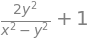

In [67]:
sympy.ratsimp(x / (x + y) + y / (x - y))

In [68]:
sympy.fraction(sympy.ratsimp(1 / x + 1 / y))

In [69]:
sympy.cancel((x ** 2 - 1) / (1 + x))

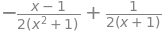

In [70]:
sympy.apart(1/(x**3 + x**2 + x + 1))

In [71]:
sympy.trigsimp(sympy.sin(x) ** 2 + 2 * sympy.sin(x) * sympy.cos(x) +
                        sympy.cos(x) ** 2)

In [72]:
sympy.powsimp(x**y*x**z*y**z, combine="exp")

In [73]:
sympy.powsimp(x**y*x**z*y**z, combine="base", force=True)

### 8.4.4	表达式求值

In [74]:
from sympy.abc import a, b
expr = b*a + - 4*a + b + a*b + 4*a + (a + b)*3
expr.subs([(a, 3), (b, 2)])

In [75]:
print(sympy.pi.evalf(30), sympy.GoldenRatio.evalf(5))

3.14159265358979323846264338328 1.6180


### 8.4.5	表达式连加

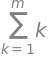

In [76]:
from sympy.abc import i, k, m, n, x
sympy.Sum(k, (k, 1, m))

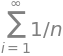

In [77]:
from sympy import oo
sympy.Sum(1/n, (i, 1, oo))

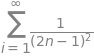

In [78]:
sympy.Sum(1/(2*n - 1)**2, (i, 1, oo))

In [79]:
sympy.Sum(k, (k, 1, 100)).doit()

In [80]:
sympy.summation(k, (k, 1, m))

### 8.4.6	表达式连乘

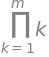

In [81]:
sympy.Product(k, (k, 1, m))

In [82]:
p = sympy.Product(k, (k, 1, 10))
p.doit()

### 8.4.7	因式分解

In [83]:
from sympy.abc import x, y, z
sympy.factor(x**2+2*x+1)

In [84]:
sympy.factor(x**3+y**3+z**3-3*x*y*z)

In [85]:
sympy.factor(a*b*(x**2-y**2)+x*y*(a**2-b**2))

### 8.4.8	逻辑运算

In [86]:
x, y, z = sympy.symbols('x,y, z')
e = (x & y) | z
e

In [87]:
sympy.to_cnf((x & y) | z)

In [88]:
sympy.to_dnf(x & (y | z))

In [89]:
from sympy.logic.boolalg import is_cnf
is_cnf((x | y) & z)

True

In [90]:
from sympy.logic.boolalg import is_dnf
is_dnf((x & y) | z)

True

In [91]:
# 化简布尔表达式
a, b, c = sympy.symbols('a b c')
e = a & (~a | ~b) & (a | c)
sympy.simplify(e)

In [92]:
# 布尔表达式等效检测
e1 = a & (b | c)
e2 = (x & y) | (x & z)
sympy.bool_map(e1, e2)

In [93]:
sympy.satisfiable(a & (~a | b) & (~b | c) & ~c) # 该表达式不可能为真

False

In [94]:
sympy.satisfiable(a & (~a | b) & (~b | c) & c)

{b: True, c: True, a: True}

## 8.5	微积分
### 8.5.1	极限

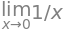

In [95]:
sympy.Limit(1/x, x, 0, dir="+-")

In [96]:
l = sympy.Limit(1/x, x, 0)
l.doit()

In [97]:
sympy.limit(1/x, x, 0, dir='+')

In [98]:
sympy.limit(1/x, x, 0, dir='-')

In [99]:
sympy.limit(1/x, x, 0, dir='+-')

ValueError: The limit does not exist since left hand limit = -oo and right hand limit = oo

### 8.5.2	级数展开

In [100]:
f = sympy.sin(x)
sympy.series(f, x)

In [101]:
f.series(x0 = 1, n = 4)

In [102]:
f.series(x0 = 1, n = 4, dir='-')

In [103]:
x0 = sympy.Symbol('x0')
f = sympy.sin(x)
f.series(x0 = x0, n = 4)

### 8.5.3	微分

In [104]:
x,y = sympy.symbols('x, y')
f = sympy.sin(x) * sympy.exp(x)
diff_f = sympy.diff(f, x)       # 一阶微分
diff_f2 = sympy.diff(f, x, 2)   # 二阶微分
sympy.pprint(diff_f)
sympy.pprint(diff_f2)

 x           x       
ℯ ⋅sin(x) + ℯ ⋅cos(x)
   x       
2⋅ℯ ⋅cos(x)


In [105]:
x = sympy.symbols('x', real=True)
h = sympy.symbols('h', positive=True)
f = sympy.symbols('f', cls=sympy.Function)

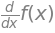

In [106]:
f_diff = f(x).diff(x, 1)   # 一阶导数
f_diff

In [107]:
expr_diff = f_diff.as_finite_difference([x, x-h, x-2*h, x-3*h]) #4点微分式
expr_diff

In [108]:
f = sympy.Function('f')
sympy.dsolve(sympy.Derivative(f(x), x) + 9*f(x), f(x))

In [109]:
t, g = sympy.symbols('t, g')
y = sympy.Function('y')
y_diff2 = sympy.Derivative(y(t), t, 2) + g
y = sympy.dsolve(y_diff2, y(t))
y

### 8.5.4	积分

In [110]:
sympy.integrate(x**2+3)

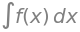

In [111]:
sympy.integrate(sympy.Function('f')(x))

In [112]:
x, y = sympy.symbols('x, y')
f = x * y + 2 * x
sympy.integrate(f, x)

In [113]:
f = x * y + 2 * x
sympy.integrate(f, y)

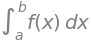

In [114]:
sympy.integrate(sympy.Function('f')(x), (x, a, b))

In [115]:
r = sympy.symbols('r', positive=True)    #半径是正数
c_area = 2 * sympy.integrate(sympy.sqrt(r**2 - x**2), (x, -r, r))
c_area

In [116]:
c_area = c_area.subs(r, sympy.sqrt(r**2 - x**2))
c_area

In [117]:
sympy.integrate(c_area, (x, -r, r))

In [118]:
C = sympy.Curve([t, t], (t, 0, 1))
F = x**2*y
sympy.line_integrate(F, C, [x, y])

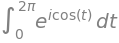

In [119]:
from sympy import S
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2*sympy.pi))
F = 1/sympy.exp(-S.ImaginaryUnit*x)
sympy.simplify(sympy.line_integrate(F, C, [x, y]))

### 8.5.6	积分变换

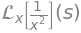

In [120]:
x, s = sympy.symbols('x, s')
f = 1/x**2
sympy.laplace_transform(f, x, s) 

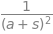

In [121]:
t = sympy.symbols('t')
s = sympy.Symbol('s')
a = sympy.Symbol('a', real=True, positive=True)
sympy.laplace_transform(sympy.exp(-a*t)*t, t, s, noconds=True)

In [122]:
sympy.inverse_laplace_transform(1, s, t, noconds=True)

In [123]:
w = sympy.Symbol('omega')
F = sympy.fourier_transform(sympy.exp(-x**2), x, w)
F

In [124]:
sympy.inverse_fourier_transform(F, w, t)

## 8.6	线性代数
### 8.6.1	矩阵

In [125]:
sympy.Matrix([[1, 0],
              [0, 1]])

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [126]:
x, y = sympy.symbols('x, y')
A = sympy.Matrix([[1, x], [y, 1]])
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [127]:
sympy.Matrix([1, 2, 3])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [128]:
sympy.Matrix([[1, 2, 3]])

[1  2  3]

In [129]:
A = sympy.Matrix([[1, x], [y, 1]])
A.shape

In [130]:
A.row(0)

[1  x]

In [131]:
A.col(-1)

⎡x⎤
⎢ ⎥
⎣1⎦

In [132]:
A.col_del(0) 
A

⎡x⎤
⎢ ⎥
⎣1⎦

In [133]:
A.row_del(1) 
A

[x]

In [134]:
A.row_insert(0, sympy.Matrix([[4]]))

⎡4⎤
⎢ ⎥
⎣x⎦

In [135]:
A

[x]

In [136]:
A = A.row_insert(3, sympy.Matrix([4, 5]))
A

⎡x⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣5⎦

In [137]:
A = A.col_insert(1, sympy.Matrix([[2, 3], [4, 5], [6, 7]]))
A

⎡x  2  3⎤
⎢       ⎥
⎢4  4  5⎥
⎢       ⎥
⎣5  6  7⎦

In [138]:
M = sympy.Matrix([[1, 3], [-2, 4]])
N = sympy.Matrix([[0, 4], [5, 6]])
M + N

⎡1  7 ⎤
⎢     ⎥
⎣3  10⎦

In [139]:
M - N

⎡1   -1⎤
⎢      ⎥
⎣-7  -2⎦

In [140]:
3 * M

⎡3   9 ⎤
⎢      ⎥
⎣-6  12⎦

In [141]:
M / 2

⎡1/2  3/2⎤
⎢        ⎥
⎣-1    2 ⎦

In [142]:
M * N

⎡15  22⎤
⎢      ⎥
⎣20  16⎦

In [143]:
N ** 2

⎡20  24⎤
⎢      ⎥
⎣30  56⎦

In [144]:
M ** -1

⎡2/5  -3/10⎤
⎢          ⎥
⎣1/5  1/10 ⎦

In [145]:
N.T

⎡0  5⎤
⎢    ⎥
⎣4  6⎦

In [146]:
A = sympy.Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
A.det()

In [147]:
A = sympy.Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
A.rref()

⎛⎡1  0   1    3 ⎤        ⎞
⎜⎢              ⎥        ⎟
⎜⎢0  1  2/3  1/3⎥, (0, 1)⎟
⎜⎢              ⎥        ⎟
⎝⎣0  0   0    0 ⎦        ⎠

In [148]:
A = sympy.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], 
                 [5, -2,  2, -2], [5, -2, -3,  3]])
A.eigenvals()

In [149]:
A.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

In [150]:
P, D = A.diagonalize()
P

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

In [151]:
D

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

In [152]:
P*D*P**-1 == A

True

In [153]:
a = sympy.Matrix([[4, 3], [6, 3]])
L, U, _ = a.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣3/2  1⎦

In [154]:
U

⎡4   3  ⎤
⎢       ⎥
⎣0  -3/2⎦

In [155]:
A = sympy.Matrix([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
Q, R = A.QRdecomposition()
Q

⎡      -69   -58  ⎤
⎢6/7   ────  ──── ⎥
⎢      175   175  ⎥
⎢                 ⎥
⎢      158        ⎥
⎢3/7   ───   6/175⎥
⎢      175        ⎥
⎢                 ⎥
⎢            -33  ⎥
⎢-2/7  6/35  ──── ⎥
⎣             35  ⎦

In [156]:
R

⎡14  21   -14⎤
⎢            ⎥
⎢0   175  -70⎥
⎢            ⎥
⎣0    0   35 ⎦

### 8.6.2	方程
#### 8.6.2.1	线性方程

In [157]:
x = sympy.Symbol('x')
sympy.solve(3*x + 4)

In [158]:
x, y, z = sympy.symbols('x, y, z')
eq1 = 3*x + 4*y + 5*z + 4
eq2 = 5*x + 6*y + 3*z + 2
eq3 = 7*x + 8*y + 9*z + 3
sympy.solve([eq1, eq2, eq3], [x, y, z])

In [159]:
p, q = sympy.symbols('p, q')
M = sympy.Matrix([[1, p], [q, 1]])
b = sympy.Matrix(sympy.symbols('b_1, b_2'))
M.solve(b)

⎡-b₁ + b₂⋅p⎤
⎢──────────⎥
⎢ p⋅q - 1  ⎥
⎢          ⎥
⎢b₁⋅q - b₂ ⎥
⎢───────── ⎥
⎣ p⋅q - 1  ⎦

In [160]:
M.LUsolve(b)

⎡     p⋅(-b₁⋅q + b₂)⎤
⎢b₁ - ──────────────⎥
⎢        -p⋅q + 1   ⎥
⎢                   ⎥
⎢    -b₁⋅q + b₂     ⎥
⎢    ──────────     ⎥
⎣     -p⋅q + 1      ⎦

In [161]:
# 增广矩阵
eq = sympy.Matrix(([3, 4, 5, 4], [5, 6, 3, 2], [7, 8, 9, 3]))
result = sympy.linsolve(eq, [x, y, z])
print(result)

FiniteSet((-37/8, 4, 3/8))


In [162]:
# 系数矩阵和常数向量
A = sympy.Matrix([[3, 4, 5], [5, 6, 3], [7, 8, 9]]) # 系数
b = sympy.Matrix(3,1,[4,2,3])
eq = A, b
result = sympy.linsolve(eq, x, y, z)
print(result)

FiniteSet((-37/8, 4, 3/8))


#### 8.6.2.2	非线性方程

In [163]:
eq1 = 3*x + 2*y - 11
eq2 = x**2 - 4*x*y + 4*y**2 + x - 2*y -2
sympy.solve([eq1, eq2], [x, y])

In [164]:
sympy.solve(x**2 - 4*x + 3)

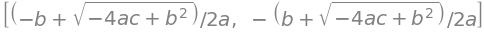

In [165]:
from sympy.abc import a, b, c
sympy.solve(a * x**2 + b*x + c, x)

In [166]:
sympy.solve(x**3 + 3*x**3 + 1)

In [167]:
sympy.solve(sympy.sin(x)+x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation x + sin(x)

In [168]:
# 初始化
x = sympy.symbols('x')
f = sympy.Function('f')

# 微分方程
expr1 = sympy.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sympy.sin(x))

# 求解微分方程
result = sympy.dsolve(expr1, f(x))
result

C1和C2是常数项，现在根据初始条件解出C1和C2。假设初始条件为f(0）= F0，f（1）=F1。 

In [169]:
F0, F1 = sympy.symbols('F_0, F_1')
init_con = {f(0):F0, f(1):F1}
init_con

In [170]:
eq1 = result.subs(x, 0).subs(init_con)
eq1

In [171]:
eq2 = result.subs(x, 1).subs(init_con)
eq2

In [172]:
sympy.solve([eq1,eq2])

In [173]:
result.subs(sympy.solve([eq1,eq2]))

## 8.9	练习

In [208]:
#1
from IPython.display import display, Latex
import sympy
sympy.init_printing(use_unicode=True)

display(Latex(r"$$\frac{1}{\sqrt{2\pi\delta^2}}e^{-\frac{(x-\mu)^2}{2\delta^2}}$$"))

<IPython.core.display.Latex object>

In [189]:
#2
sympy.pi.evalf(100)

In [207]:
#3
from IPython.display import display, Latex
import sympy
sympy.init_printing(use_unicode=True)

display(Latex(r"$$\frac{\partial^2 u}{\partial t^2}={c^2}\frac{\partial^2 u}{\partial x^2}$$"))

<IPython.core.display.Latex object>

In [209]:
#4
from IPython.display import display, Latex
import sympy
x, y, z = sympy.symbols('x y z')
sympy.init_printing(use_unicode=True)

f1 = sympy.exp(x*y*z)
display(Latex(r"$$\frac{\partial^7}{\partial x \partial y^2 \partial z^4}"+f"{sympy.latex(f1)}={ sympy.latex(sympy.diff(f1,x,y,2,z,4))}$$"))

<IPython.core.display.Latex object>

### 5
$$f = x e^{-x} + x (1-x)$$

In [218]:
import sympy
x, y = sympy.symbols('x y')
f = x*sympy.exp(-x)+x*(1-x)
for i in [0, 0.1, 0.2, 0.4, 0.8]:
    print(f.subs(x,i).evalf())

0
0.180483741803596
0.323746150615596
0.508128018414256
0.519463171293777


In [219]:
# 6

import sympy
sympy.init_printing()

A = sympy.Matrix(3, 3, [1, 0,1,-1,2,3,1,2,3])
A

⎡1   0  1⎤
⎢        ⎥
⎢-1  2  3⎥
⎢        ⎥
⎣1   2  3⎦

In [222]:
# 7
x, y, z = sympy.symbols('x y z')
v = sympy.Matrix(3, 1, [x,y,z])
result = A*v
result

⎡    x + z     ⎤
⎢              ⎥
⎢-x + 2⋅y + 3⋅z⎥
⎢              ⎥
⎣x + 2⋅y + 3⋅z ⎦

In [227]:
# 8
import sympy
sympy.init_printing()
x, y, z = sympy.symbols('x y z')

eq1 = sympy.Eq(x**2-y**2-z, 0)
eq2 = sympy.Eq(x**2+y**2+4,0)
eq3 = sympy.Eq(x+y-z,0)

sympy.solve([eq1, eq2, eq3], [x,y,z])


In [229]:
import sympy
sympy.init_printing()

f = sympy.Function('f')
sympy.dsolve(f(x).diff(x, 2) + f(x))